In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from RateTraining import *
from RateTraining import RateTraining
from LIFTraining import *

In [3]:
def stabilize_net(net, ufin):
    for i in range(3):
        net.run(ufin)

In [4]:
def plot_run_net(net, ufin):
    voltage, slow, fast = net.runGPU(ufin)

    Jslow = np.dot(net.Js, slow)
    wout = np.dot(net.W_out, slow)
    tot = net.T
    n_plot = 5
    T = net.T
    dt = net.dt

    fig, axs = plt.subplots(n_plot + 3, 1, figsize = (6, 12), sharex = True)
    for i in range(n_plot):
        axs[i].plot(Jslow[i])
        axs[i].plot(aux_targs[i, 0:tot])
    for i in range(net.num_outs):
        axs[n_plot + i].plot(wout[i])
        axs[n_plot + i].plot(fout[i, 0:tot])


    axs[0].set_title("Behavior after training")

In [5]:
aux_targs = np.load("aux_targs.npy")
ufin = np.load("ufin.npy")

W_out = np.load("W_out.npy")
Js = np.load("Js.npy")
Jf = np.load("Jf.npy")

In [6]:
raw_waveforms = np.transpose(np.load("raw_form.npy"))
freqs = np.load("fin.npy")

hfout = raw_waveforms[0][1203:22125]
pfout = raw_waveforms[1][1203:22125]
vfout = raw_waveforms[2][1203:22125]

fout = np.vstack((hfout, pfout, vfout))

In [7]:
p = create_default_params_LIF()
p

{'net_size': 300,
 'num_out': 1,
 'tau_s': 100,
 'tau_f': 2,
 'tau_m': 20,
 'gain': 7,
 'bias': 10,
 'v_thr': -55,
 'v_rest': -65,
 't_refract': 2,
 'total_time': 1000,
 'dt': 1,
 'lam': 5,
 'training_loops': 10,
 'train_every': 2,
 'm': -57,
 'std': 17,
 'cp': 1,
 'runtime': 1000}

In [8]:
p['net_size'] = np.shape(Js)[0]
p['num_out'] = np.shape(W_out)[0]
p['total_time'] = np.shape(aux_targs)[1]
p['runtime'] = np.shape(aux_targs)[1]

In [9]:
p

{'net_size': 1000,
 'num_out': 3,
 'tau_s': 100,
 'tau_f': 2,
 'tau_m': 20,
 'gain': 7,
 'bias': 10,
 'v_thr': -55,
 'v_rest': -65,
 't_refract': 2,
 'total_time': 20922,
 'dt': 1,
 'lam': 5,
 'training_loops': 10,
 'train_every': 2,
 'm': -57,
 'std': 17,
 'cp': 1,
 'runtime': 20922}

In [10]:
net = LIFTraining(p)

In [11]:
net.Js = np.copy(Js)
net.Jf = np.copy(Jf)
net.W_out = np.copy(W_out)


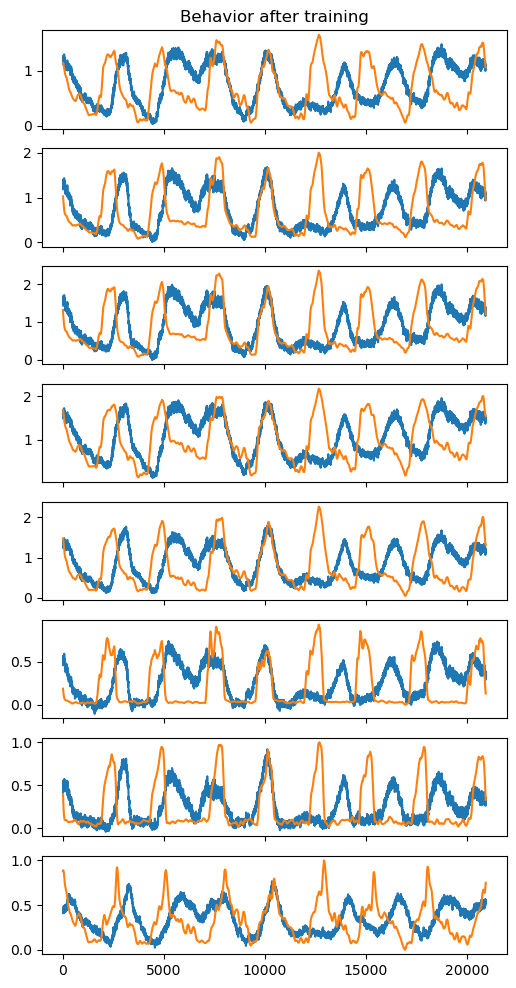

In [12]:
stabilize_net(net, ufin)
plot_run_net(net, ufin)

In [56]:
Js_excit = np.zeros(np.shape(Js))
N = np.shape(Js)[0]

for i in range(N):
    for j in range(N):
        if Js[i, j] > 0:
            Js_excit[i, j] = Js[i, j] * 1.001

In [51]:
Js_inhib = np.zeros(np.shape(Js))
N = np.shape(Js)[0]

for i in range(N):
    for j in range(N):
        if Js[i, j] < 0:
            Js_inhib[i, j] = Js[i, j] * 1.001

In [52]:
net_excit = LIFTraining(p)
net_inhib = LIFTraining(p)

In [57]:
net_excit.Js = np.copy(Js_excit)
net_excit.Jf = np.copy(Jf)
net_excit.W_out = np.copy(W_out)

net_inhib.Js = np.copy(Js_inhib)
net_inhib.Jf = np.copy(Jf)
net_inhib.W_out = np.copy(W_out)

In [58]:
stabilize_net(net_excit, ufin)
plot_run_net(net_excit, ufin)

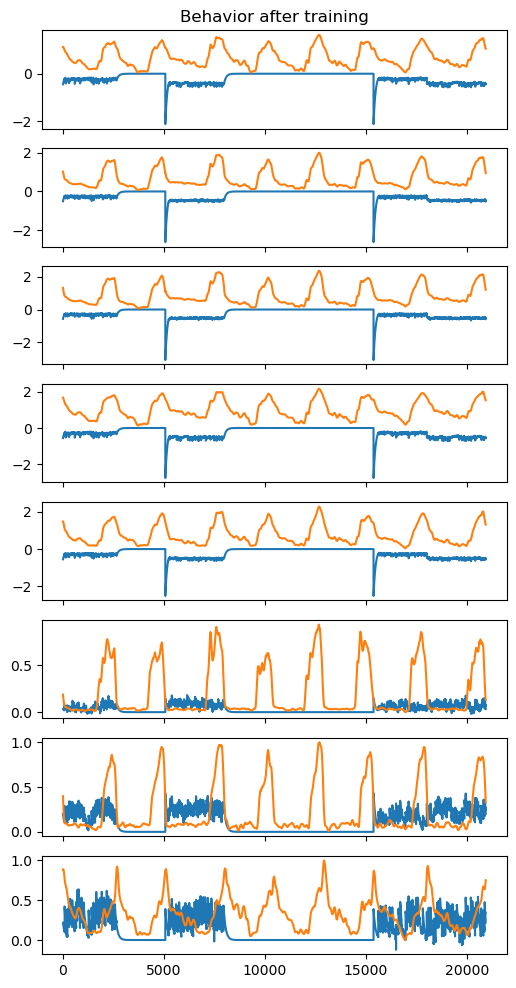

In [55]:
stabilize_net(net_inhib, ufin)
plot_run_net(net_inhib, ufin)